In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! git clone https://github.com/benrosenberg/ORIE-4741-project.git

Cloning into 'ORIE-4741-project'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 172 (delta 85), reused 61 (delta 27), pack-reused 0
Receiving objects: 100% (172/172), 8.14 MiB | 11.07 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [3]:
users_train = pd.read_csv("/content/ORIE-4741-project/datasets/training_users_list.csv")
users_test = pd.read_csv("/content/ORIE-4741-project/datasets/testing_users_list.csv")
all_users = pd.read_csv("/content/ORIE-4741-project/datasets/users_cleaned.csv")

In [4]:
us_users = pd.concat([users_train, users_test], axis=0)

In [5]:
us_users.groupby(by='gender')['username'].count()

gender
Female         6066
Male          12855
Non-Binary       84
Name: username, dtype: int64

In [6]:
us_users.groupby(by='gender')['username'].count() / len(us_users)

gender
Female        0.319179
Male          0.676401
Non-Binary    0.004420
Name: username, dtype: float64

In [7]:
all_users.groupby(by='gender')['username'].count()

gender
Female        37330
Male          70879
Non-Binary      501
Name: username, dtype: int64

In [8]:
all_users.groupby(by='gender')['username'].count() / len(all_users)

gender
Female        0.343388
Male          0.651995
Non-Binary    0.004609
Name: username, dtype: float64

In [9]:
us_users.groupby(by='gender').user_days_spent_watching.sum()

gender
Female        226842.669190
Male          788336.514491
Non-Binary      4879.744097
Name: user_days_spent_watching, dtype: float64

In [10]:
us_users.groupby(by='gender').user_days_spent_watching.mean()

gender
Female        37.395758
Male          61.325283
Non-Binary    58.092192
Name: user_days_spent_watching, dtype: float64

In [11]:
all_users.groupby(by='gender').user_days_spent_watching.mean()

gender
Female        47.212740
Male          69.643065
Non-Binary    63.806513
Name: user_days_spent_watching, dtype: float64

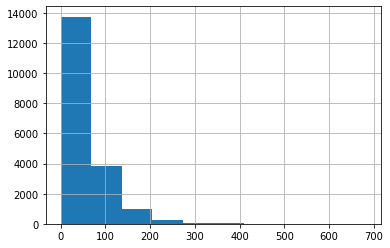

In [12]:
us_users.user_days_spent_watching.hist()

In [13]:
real_humans = all_users[all_users.user_days_spent_watching < 500]
real_humans.groupby(by='gender').user_days_spent_watching.sum() / 10

gender
Female        175177.376020
Male          489439.512988
Non-Binary      3056.354405
Name: user_days_spent_watching, dtype: float64

In [14]:
real_humans_us = us_users[all_users.user_days_spent_watching < 500]
real_humans_us.groupby(by='gender').user_days_spent_watching.sum() / 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


gender
Female        22673.871711
Male          78756.875269
Non-Binary      487.974410
Name: user_days_spent_watching, dtype: float64

In [15]:
users_train.groupby(by='gender')['username'].count() / len(users_train)

gender
Female        0.318798
Male          0.676401
Non-Binary    0.004801
Name: username, dtype: float64

In [16]:
gender_proportions_usa = pd.DataFrame({"Proportion" : us_users.groupby(by='gender')['username'].count() / len(us_users)})
gender_proportions_usa["Country"] = ["USA", "USA", "USA"]
gender_proportions_usa.reset_index(inplace=True)
gender_proportions_usa

,gender,Proportion,Country
0,Female,0.319179,USA
1,Male,0.676401,USA
2,Non-Binary,0.004420,USA


In [17]:
gender_proportions_int = pd.DataFrame({"Proportion" : all_users.groupby(by='gender')['username'].count() / len(all_users)})
gender_proportions_int["Country"] = ["International", "International", "International"]
gender_proportions_int.reset_index(inplace=True)
gender_proportions_int

,gender,Proportion,Country
0,Female,0.343388,International
1,Male,0.651995,International
2,Non-Binary,0.004609,International


In [18]:
gender_proportions = pd.concat([gender_proportions_usa, gender_proportions_int], axis=0)
gender_proportions

,gender,Proportion,Country
0,Female,0.319179,USA
1,Male,0.676401,USA
2,Non-Binary,0.004420,USA
0,Female,0.343388,International
1,Male,0.651995,International
2,Non-Binary,0.004609,International


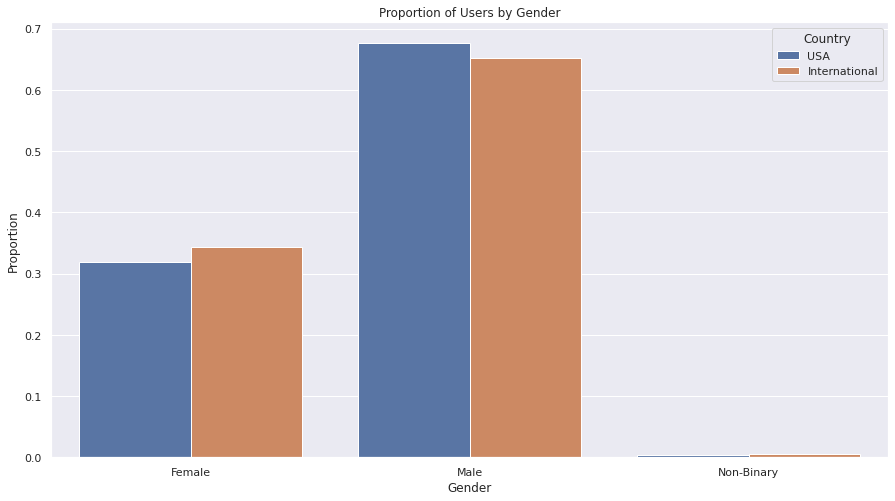

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x = 'gender', y = 'Proportion', hue='Country', data=gender_proportions)
p.set( xlabel = "Gender", ylabel = "Proportion", title='Proportion of Users by Gender')
plt.savefig('users_by_gender.png')
plt.show()

In [22]:
time_proportions_usa = pd.DataFrame({"Proportion of Time Watched" : us_users.groupby(by='gender').user_days_spent_watching.sum() / us_users.user_days_spent_watching.sum()})
time_proportions_usa["Country"] = ["USA", "USA", "USA"]
time_proportions_usa.reset_index(inplace=True)
time_proportions_usa

,gender,Proportion of Time Watched,Country
0,Female,0.222382,USA
1,Male,0.772834,USA
2,Non-Binary,0.004784,USA


In [23]:
time_proportions_int = pd.DataFrame({"Proportion of Time Watched" : all_users.groupby(by='gender').user_days_spent_watching.sum() / all_users.user_days_spent_watching.sum()})
time_proportions_int["Country"] = ["International", "International", "International"]
time_proportions_int.reset_index(inplace=True)
time_proportions_int

,gender,Proportion of Time Watched,Country
0,Female,0.261852,International
1,Male,0.733399,International
2,Non-Binary,0.004749,International


In [24]:
time_proportions = pd.concat([time_proportions_usa, time_proportions_int], axis=0)
time_proportions

,gender,Proportion of Time Watched,Country
0,Female,0.222382,USA
1,Male,0.772834,USA
2,Non-Binary,0.004784,USA
0,Female,0.261852,International
1,Male,0.733399,International
2,Non-Binary,0.004749,International


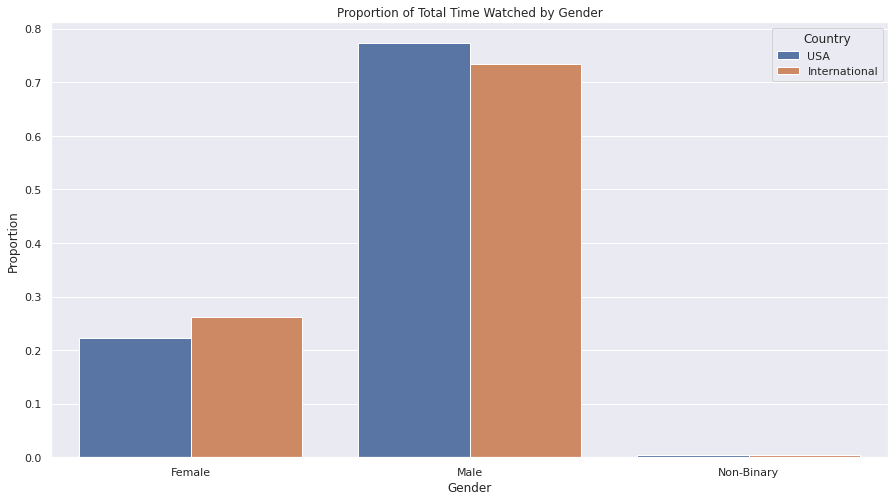

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x = 'gender', y = 'Proportion of Time Watched', hue='Country', data=time_proportions)
p.set( xlabel = "Gender", ylabel = "Proportion", title='Proportion of Total Time Watched by Gender')
plt.savefig('time_watched_by_gender.png')
plt.show()